<a href="https://colab.research.google.com/github/antonychackotc/project-4/blob/main/1st_4m_feature_selection_%26_model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

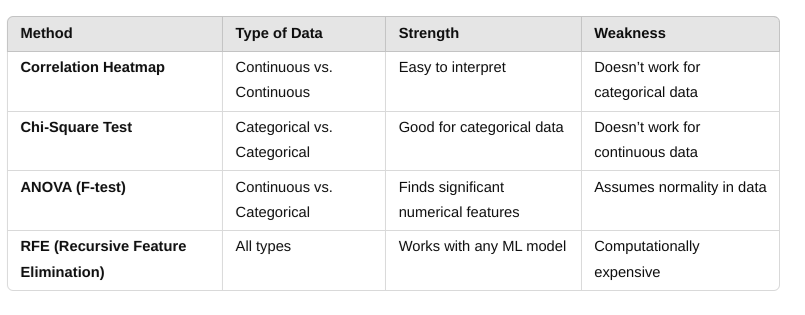

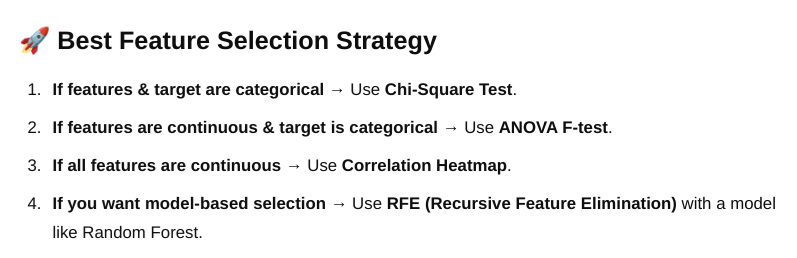

In [ ]:
##################################################################

In [ ]:
import pandas as pd
df=pd.read_csv('/content/feature-engineered-updated.csv')

In [ ]:
df.head()

,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,Gender,HourlyRate,JobLevel,...,NumCompaniesWorked,JobRole_FreqEncoded,EducationField_FreqEncoded,Department_Research_and_Development,Department_Sales,MaritalStatus_Married,MaritalStatus_Single,Tenure_Category,Performance_Score,Engagement_Score
0,41,1,1102,1,2,1,1,0,94,2,...,8,285,510,False,True,False,True,New,2.9,1.2
1,37,1,1373,2,2,1,4,1,92,1,...,6,217,68,True,False,False,True,New,3.0,2.0
2,33,2,1392,3,4,1,5,0,56,1,...,1,243,510,True,False,True,False,Intermediate,3.0,2.2
3,27,1,591,2,1,1,7,1,40,1,...,9,217,389,True,False,True,False,New,2.7,1.8
4,32,2,1005,2,2,1,8,1,79,1,...,0,217,510,True,False,False,True,Intermediate,3.1,1.4


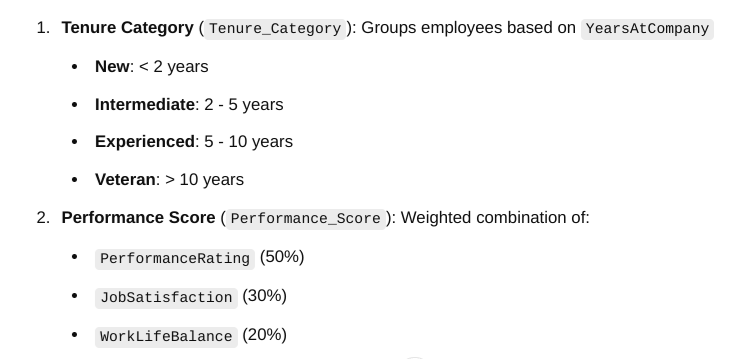

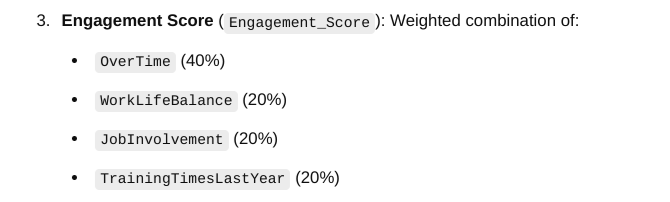

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244 entries, 0 to 1243
Data columns (total 40 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  1244 non-null   int64  
 1   BusinessTravel                       1244 non-null   int64  
 2   DailyRate                            1244 non-null   int64  
 3   DistanceFromHome                     1244 non-null   int64  
 4   Education                            1244 non-null   int64  
 5   EmployeeCount                        1244 non-null   int64  
 6   EmployeeNumber                       1244 non-null   int64  
 7   Gender                               1244 non-null   int64  
 8   HourlyRate                           1244 non-null   int64  
 9   JobLevel                             1244 non-null   int64  
 10  MonthlyIncome                        1244 non-null   int64  
 11  MonthlyRate                   

In [ ]:
# Re-import necessary libraries since execution state was lost
import pandas as pd
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Reload dataset
file_path = "/content/feature-engineered-updated.csv"
df = pd.read_csv(file_path)

# Define target variable
y = df["Attrition"]
X = df.drop(columns=["Attrition"])

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=["int64", "object"]).columns.tolist()
numerical_features = X.select_dtypes(include=["float64"]).columns.tolist()

# Encode categorical features (Label Encoding for non-numeric categories)
label_encoders = {}
for col in categorical_features:
    if X[col].dtype == "object":  # Check if column is of type object (string)
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
        label_encoders[col] = le  # Store encoder for future reference

# Ensure categorical variables are non-negative for Chi-Square Test
X_categorical = X[categorical_features].astype(int)

# Normalize numerical features for ANOVA
scaler = MinMaxScaler()
X_numerical = pd.DataFrame(scaler.fit_transform(X[numerical_features]), columns=numerical_features)

# 1️⃣ Chi-Square Test for Categorical Features
chi2_scores, chi2_pvalues = chi2(X_categorical, y)
chi2_results = pd.DataFrame({"Feature": categorical_features, "Chi2 Score": chi2_scores, "p-value": chi2_pvalues})
chi2_results = chi2_results.sort_values(by="Chi2 Score", ascending=False)

# 2️⃣ ANOVA (F-Test) for Numerical Features
f_scores, f_pvalues = f_classif(X_numerical, y)
anova_results = pd.DataFrame({"Feature": numerical_features, "F Score": f_scores, "p-value": f_pvalues})
anova_results = anova_results.sort_values(by="F Score", ascending=False)

# 3️⃣ Mutual Information (MI) for Both
mi_scores = mutual_info_classif(X, y)
mi_results = pd.DataFrame({"Feature": X.columns, "MI Score": mi_scores})
mi_results = mi_results.sort_values(by="MI Score", ascending=False)

# 4️⃣ Recursive Feature Elimination (RFE) using Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFE(rf_model, n_features_to_select=10)  # Selecting top 10 features
rfe.fit(X, y)
rfe_results = pd.DataFrame({"Feature": X.columns, "RFE Ranking": rfe.ranking_})
rfe_results = rfe_results.sort_values(by="RFE Ranking", ascending=True)

# Display top features from each method
chi2_results.head(10), anova_results.head(10), mi_results.head(10), rfe_results.head(10)


(                       Feature    Chi2 Score        p-value
 10               MonthlyIncome  87845.756672   0.000000e+00
 11                 MonthlyRate   1546.375873   0.000000e+00
 2                    DailyRate    745.900078  3.125183e-164
 28  EducationField_FreqEncoded    623.023663  1.644841e-137
 20        YearsWithCurrManager     89.399055   3.226907e-21
 19          YearsInCurrentRole     87.797185   7.252208e-21
 27         JobRole_FreqEncoded     67.591615   2.011211e-16
 0                          Age     64.928032   7.768406e-16
 25                    OverTime     47.780820   4.766322e-12
 3             DistanceFromHome     35.311848   2.809179e-09,
                    Feature    F Score       p-value
 0        TotalWorkingYears  64.295876  2.454288e-15
 1           YearsAtCompany  43.984125  4.927276e-11
 3        Performance_Score  12.853290  3.499530e-04
 2  YearsSinceLastPromotion   1.196154  2.743037e-01
 4         Engagement_Score   0.019247  8.896827e-01,
         

In [ ]:
chi2_results

,Feature,Chi2 Score,p-value
10,MonthlyIncome,87845.756672,0.000000e+00
11,MonthlyRate,1546.375873,0.000000e+00
2,DailyRate,745.900078,3.125183e-164
28,EducationField_FreqEncoded,623.023663,1.644841e-137
20,YearsWithCurrManager,89.399055,3.226907e-21
19,YearsInCurrentRole,87.797185,7.252208e-21
27,JobRole_FreqEncoded,67.591615,2.011211e-16
0,Age,64.928032,7.768406e-16
25,OverTime,47.780820,4.766322e-12
3,DistanceFromHome,35.311848,2.809179e-09


In [ ]:
chi2_results.shape

(30, 3)

In [ ]:
mi_results

,Feature,MI Score
10,MonthlyIncome,0.033987
21,TotalWorkingYears,0.031914
28,OverTime,0.031318
22,YearsAtCompany,0.030771
0,Age,0.028102
9,JobLevel,0.021467
33,Department_Sales,0.019932
36,Tenure_Category,0.019224
30,JobRole_FreqEncoded,0.018402
16,StockOptionLevel,0.018086


In [ ]:
mi_results.shape

(39, 2)

In [ ]:
rfe_results

,Feature,RFE Ranking
0,Age,1
2,DailyRate,1
3,DistanceFromHome,1
6,EmployeeNumber,1
10,MonthlyIncome,1
11,MonthlyRate,1
8,HourlyRate,1
22,YearsAtCompany,1
21,TotalWorkingYears,1
37,Performance_Score,1


In [ ]:
rfe_results.shape

(39, 2)

In [ ]:
print(chi2_results.shape)
print(anova_results.shape)
print(mi_results.shape)
print(rfe_results.shape)

(30, 3)
(5, 3)
(39, 2)
(39, 2)


In [ ]:
# Get top 10 features from each method
top_chi2 = chi2_results["Feature"].head(10).tolist()
top_anova = anova_results["Feature"].head(10).tolist()
top_mi = mi_results["Feature"].head(10).tolist()
top_rfe = rfe_results["Feature"].head(10).tolist()

# Create feature sets
feature_sets = {
    "Chi-Square": top_chi2,
    "ANOVA": top_anova,
    "Mutual Information": top_mi,
    "RFE": top_rfe
}

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Dictionary to store accuracy results
accuracy_results = {}

for method, features in feature_sets.items():
    X_selected = X[features]  # Select only the top features from this method

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

    # Train Logistic Regression
    model = LogisticRegression(max_iter=500, solver="saga")
    model.fit(X_train, y_train)

    # Get predictions & accuracy
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Store result
    accuracy_results[method] = accuracy

# Display accuracy results
accuracy_results


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


{'Chi-Square': 0.8313253012048193,
 'ANOVA': 0.8393574297188755,
 'Mutual Information': 0.8313253012048193,
 'RFE': 0.8313253012048193}

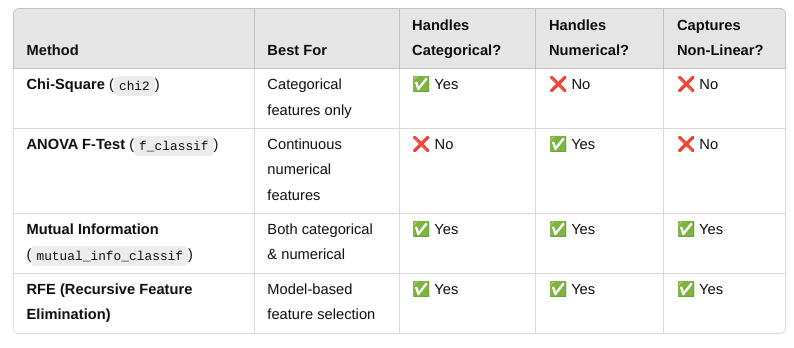

# **Move to Mutual Information or RFE is best**

In [ ]:
##########################################################################

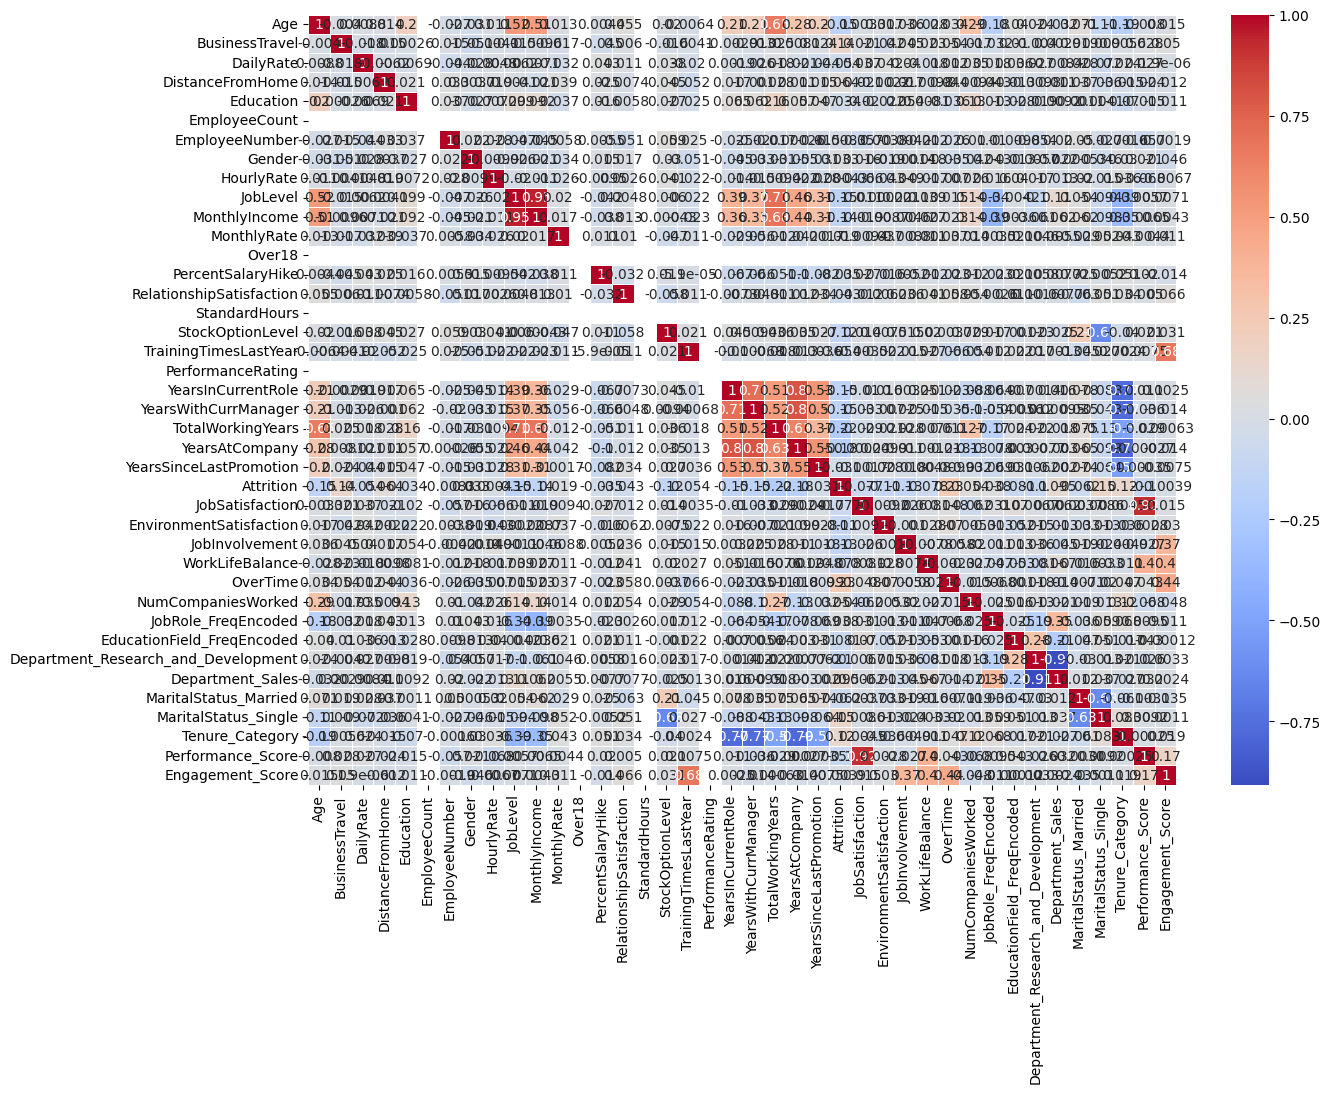

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert categorical columns to numeric using label encoding
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

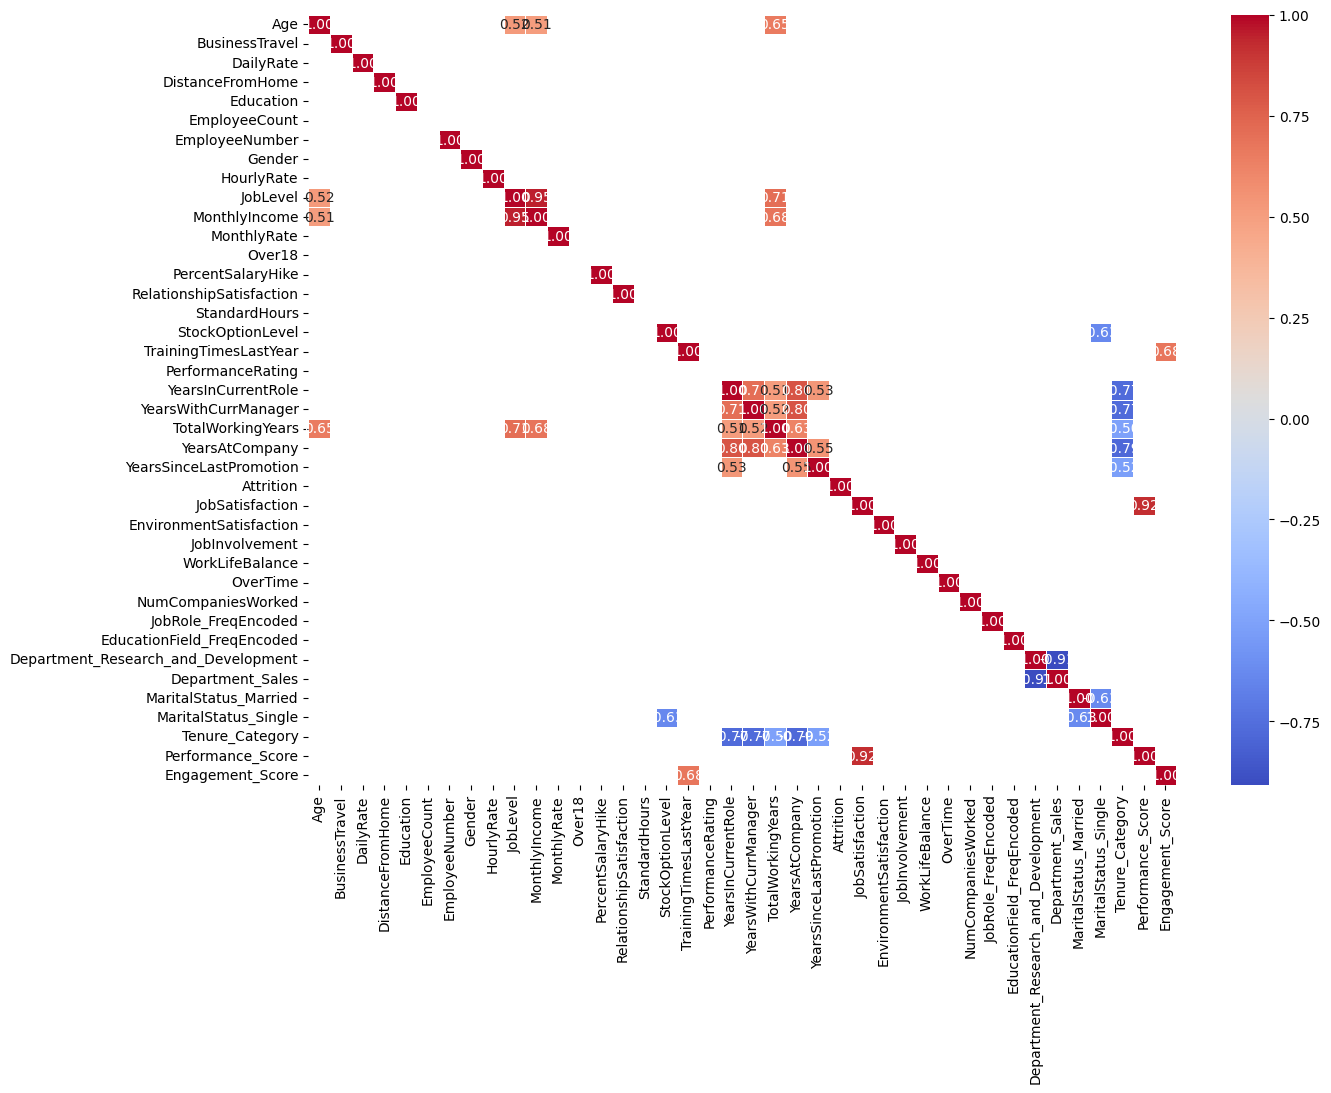

In [ ]:
from sklearn.preprocessing import LabelEncoder

df = df.copy()
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

corr_matrix = df.corr()


corr_matrix = df.corr()
mask = (corr_matrix < 0.5) & (corr_matrix > -0.5)

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, mask=mask)
plt.show()

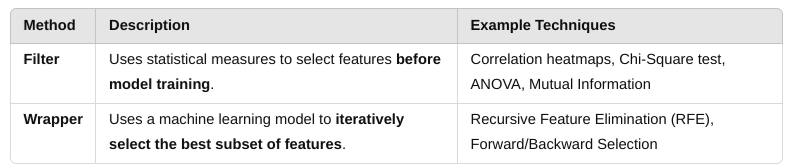

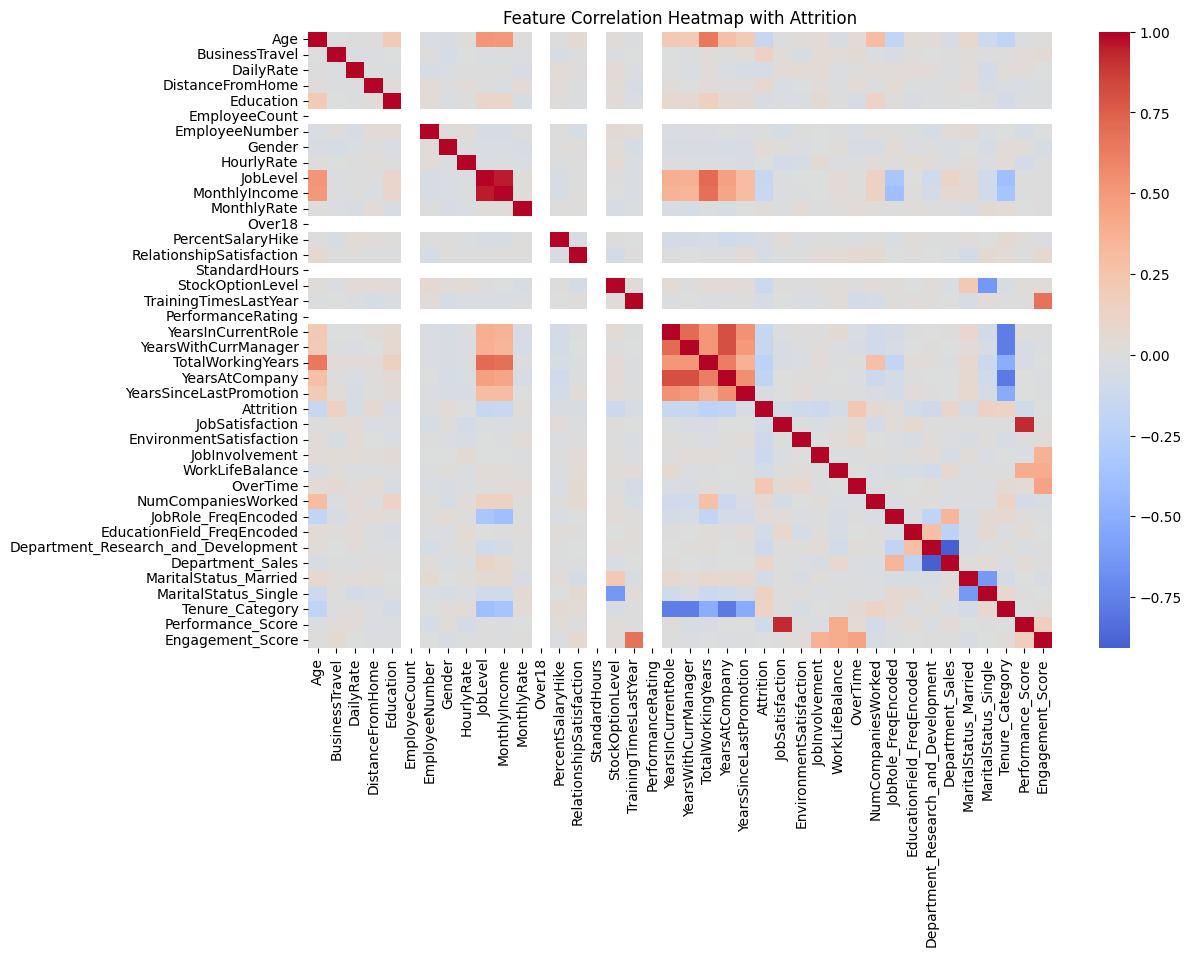

Top 14 Features Most Correlated with Attrition:
OverTime                   0.231314
TotalWorkingYears          0.221856
YearsAtCompany             0.184940
JobLevel                   0.152849
Age                        0.152598
YearsWithCurrManager       0.152104
YearsInCurrentRole         0.151308
MaritalStatus_Single       0.145502
MonthlyIncome              0.144153
BusinessTravel             0.136136
JobInvolvement             0.129409
Tenure_Category            0.123146
StockOptionLevel           0.121294
EnvironmentSatisfaction    0.108631
Name: Attrition, dtype: float64


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/feature-engineered-updated.csv")  # Change the path accordingly

# Convert categorical features to numeric (if any)
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category').cat.codes

# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap with Attrition")
plt.show()

# Extract top correlated features with Attrition
correlation_with_target = correlation_matrix["Attrition"].abs().sort_values(ascending=False)
top_features = correlation_with_target[1:15]  # Exclude Attrition itself

print("Top 14 Features Most Correlated with Attrition:")
print(top_features)


In [ ]:
df['Attrition'].value_counts()

,count
Attrition,
0,1044
1,200


# **Attrition  - 0 is high and afftected by wearing is low**

In [ ]:
##############################################################################################

**no need focus on attrition yes or no just run model for prediction means need focus only for accuracy more than 80 no need to focus precession or recall or f1score. if task to give to focus on or filter more attrition yes means I need to focus precision actual positive and predicted positive no need to focus recall, if task to give find more attrition no person need only focus recall only. so if task give need predicted attrition yes or no need means need to focus f1 score.**

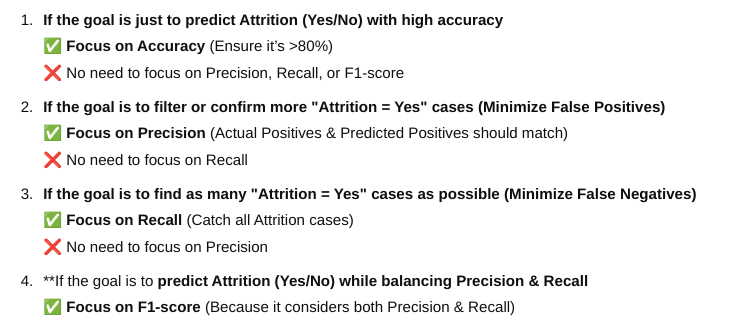

# **Feature Selection Based on Heatmap**

In [ ]:
feature = df[['OverTime','TotalWorkingYears','YearsAtCompany','JobLevel','Age','YearsWithCurrManager','YearsInCurrentRole','MaritalStatus_Married','MaritalStatus_Single','MonthlyIncome','BusinessTravel']]
target = df['Attrition']

In [ ]:
feature.head()

,OverTime,TotalWorkingYears,YearsAtCompany,JobLevel,Age,YearsWithCurrManager,YearsInCurrentRole,MaritalStatus_Married,MaritalStatus_Single,MonthlyIncome,BusinessTravel
0,1,2.197225,1.945910,2,41,5,4,False,True,5993,1
1,1,2.079442,0.000000,1,37,0,0,False,True,2090,1
2,1,2.197225,2.197225,1,33,0,7,True,False,2909,2
3,0,1.945910,1.098612,1,27,2,2,True,False,3468,1
4,0,2.197225,2.079442,1,32,6,7,False,True,3068,2


In [ ]:
feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244 entries, 0 to 1243
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   OverTime               1244 non-null   int64  
 1   TotalWorkingYears      1244 non-null   float64
 2   YearsAtCompany         1244 non-null   float64
 3   JobLevel               1244 non-null   int64  
 4   Age                    1244 non-null   int64  
 5   YearsWithCurrManager   1244 non-null   int64  
 6   YearsInCurrentRole     1244 non-null   int64  
 7   MaritalStatus_Married  1244 non-null   bool   
 8   MaritalStatus_Single   1244 non-null   bool   
 9   MonthlyIncome          1244 non-null   int64  
 10  BusinessTravel         1244 non-null   int64  
dtypes: bool(2), float64(2), int64(7)
memory usage: 90.0 KB


# **Features is Not Suited and Accuracy Not Clear So Use RFE - Wrapper Method**

In [ ]:
print(rfe_results.shape)

(39, 2)


In [ ]:
rfe_results.head(15)

,Feature,RFE Ranking
0,Age,1
2,DailyRate,1
3,DistanceFromHome,1
6,EmployeeNumber,1
10,MonthlyIncome,1
11,MonthlyRate,1
8,HourlyRate,1
22,YearsAtCompany,1
21,TotalWorkingYears,1
37,Performance_Score,1


# **Feature Selection Based on RFE Method**

In [ ]:
features = ['Age', 'DailyRate', 'DistanceFromHome', 'EmployeeNumber',
            'MonthlyIncome', 'MonthlyRate', 'HourlyRate', 'YearsAtCompany','TotalWorkingYears','TotalWorkingYears','Performance_Score']

In [ ]:
##############################################################################################################

# **1) Logistic Regression - rfe based**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, log_loss

# Select features and target
features_rfe = ['Age', 'DailyRate', 'DistanceFromHome', 'EmployeeNumber',
            'MonthlyIncome', 'MonthlyRate', 'HourlyRate', 'YearsAtCompany','TotalWorkingYears','TotalWorkingYears','Performance_Score']
target_rfe = 'Attrition'

X = df[features_rfe]
y = df[target_rfe]

# Convert categorical features (if any) to numerical
for col in X.select_dtypes(include=['object']).columns:
    X[col] = X[col].astype('category').cat.codes

# Split data into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Logistic Regression model (without scaling)
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Predict on train and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Compute probabilities for cross-entropy loss
y_train_proba = model.predict_proba(X_train)
y_test_proba = model.predict_proba(X_test)

# Evaluate Model Performance
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='binary')
recall = recall_score(y_test, y_test_pred, average='binary')

# Compute Cross-Entropy Loss
train_loss = log_loss(y_train, y_train_proba)
test_loss = log_loss(y_test, y_test_proba)

# Print Results
print("Model Performance Metrics:")
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Train Cross-Entropy Loss: {train_loss:.4f}")
print(f"Test Cross-Entropy Loss: {test_loss:.4f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))


Model Performance Metrics:
Train Accuracy: 0.5889
Test Accuracy: 0.5823
Precision: 0.2288
Recall: 0.6750
Train Cross-Entropy Loss: 0.6558
Test Cross-Entropy Loss: 0.6601

Confusion Matrix:
[[118  91]
 [ 13  27]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.56      0.69       209
           1       0.23      0.68      0.34        40

    accuracy                           0.58       249
   macro avg       0.56      0.62      0.52       249
weighted avg       0.79      0.58      0.64       249



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# **Cross Validation for Logistic Regression - rfe Based**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, log_loss

# Select features and target
features = ['Age', 'DailyRate', 'DistanceFromHome', 'EmployeeNumber',
            'MonthlyIncome', 'MonthlyRate', 'HourlyRate', 'YearsAtCompany','TotalWorkingYears','TotalWorkingYears','Performance_Score']

target = 'Attrition'

X = df[features]
y = df[target]

# Convert categorical features (if any) to numerical
for col in X.select_dtypes(include=['object']).columns:
    X[col] = X[col].astype('category').cat.codes

# Set up Stratified K-Fold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store performance metrics for each fold
accuracies, precisions, recalls, losses = [], [], [], []

# Perform Stratified K-Fold Cross-Validation
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train Logistic Regression
    model = LogisticRegression(class_weight='balanced', random_state=42)
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)

    # Evaluate performance
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred, average='binary'))
    recalls.append(recall_score(y_test, y_pred, average='binary'))
    losses.append(log_loss(y_test, y_proba))

# Print average performance across folds
print("Stratified K-Fold Cross-Validation Results:")
print(f"Average Accuracy: {np.mean(accuracies):.4f}")
print(f"Average Precision: {np.mean(precisions):.4f}")
print(f"Average Recall: {np.mean(recalls):.4f}")
print(f"Average Cross-Entropy Loss: {np.mean(losses):.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Stratified K-Fold Cross-Validation Results:
Average Accuracy: 0.5876
Average Precision: 0.2110
Average Recall: 0.5700
Average Cross-Entropy Loss: 0.6525


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
##################################################################################################

In [ ]:
feature = df[['OverTime','TotalWorkingYears','YearsAtCompany','JobLevel','Age','YearsWithCurrManager','YearsInCurrentRole','MaritalStatus_Married','MaritalStatus_Single','MonthlyIncome','BusinessTravel']]
target = df['Attrition']

# **2) Logistic Regression - Heatmap Correlation Based**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, log_loss

# Select features and target
feature_heat = ['OverTime','TotalWorkingYears','YearsAtCompany','JobLevel','Age','YearsWithCurrManager','YearsInCurrentRole','MaritalStatus_Married','MaritalStatus_Single','MonthlyIncome','BusinessTravel']

target_heat = 'Attrition'

X = df[feature_heat]
y = df[target_heat]

# Convert categorical features (if any) to numerical
for col in X.select_dtypes(include=['object']).columns:
    X[col] = X[col].astype('category').cat.codes

# Split data into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Logistic Regression model (without scaling)
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Predict on train and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Compute probabilities for cross-entropy loss
y_train_proba = model.predict_proba(X_train)
y_test_proba = model.predict_proba(X_test)

# Evaluate Model Performance
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='binary')
recall = recall_score(y_test, y_test_pred, average='binary')

# Compute Cross-Entropy Loss
train_loss = log_loss(y_train, y_train_proba)
test_loss = log_loss(y_test, y_test_proba)

# Print Results
print("Model Performance Metrics:")
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Train Cross-Entropy Loss: {train_loss:.4f}")
print(f"Test Cross-Entropy Loss: {test_loss:.4f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))


Model Performance Metrics:
Train Accuracy: 0.7075
Test Accuracy: 0.7149
Precision: 0.3258
Recall: 0.7250
Train Cross-Entropy Loss: 0.5728
Test Cross-Entropy Loss: 0.5850

Confusion Matrix:
[[149  60]
 [ 11  29]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.71      0.81       209
           1       0.33      0.72      0.45        40

    accuracy                           0.71       249
   macro avg       0.63      0.72      0.63       249
weighted avg       0.83      0.71      0.75       249



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# **Cross Validation for Logistic Regression - Heatmap Correlation Based**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, log_loss


# Select features and target
feature_heat = ['OverTime','TotalWorkingYears','YearsAtCompany','JobLevel','Age','YearsWithCurrManager','YearsInCurrentRole','MaritalStatus_Married','MaritalStatus_Single','MonthlyIncome','BusinessTravel']

target_heat = 'Attrition'

X = df[feature_heat]
y = df[target_heat]

# Convert categorical features (if any) to numerical
for col in X.select_dtypes(include=['object']).columns:
    X[col] = X[col].astype('category').cat.codes

# Set up Stratified K-Fold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store performance metrics for each fold
accuracies, precisions, recalls, losses = [], [], [], []

# Perform Stratified K-Fold Cross-Validation
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train Logistic Regression
    model = LogisticRegression(class_weight='balanced', random_state=42)
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)

    # Evaluate performance
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred, average='binary'))
    recalls.append(recall_score(y_test, y_pred, average='binary'))
    losses.append(log_loss(y_test, y_proba))

# Print average performance across folds
print("Stratified K-Fold Cross-Validation Results:")
print(f"Average Accuracy: {np.mean(accuracies):.4f}")
print(f"Average Precision: {np.mean(precisions):.4f}")
print(f"Average Recall: {np.mean(recalls):.4f}")
print(f"Average Cross-Entropy Loss: {np.mean(losses):.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Stratified K-Fold Cross-Validation Results:
Average Accuracy: 0.6800
Average Precision: 0.2972
Average Recall: 0.7150
Average Cross-Entropy Loss: 0.5931


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
###################################################################################################

In [ ]:
mi_results.head(12)

,Feature,MI Score
10,MonthlyIncome,0.033987
21,TotalWorkingYears,0.031914
28,OverTime,0.031318
22,YearsAtCompany,0.030771
0,Age,0.028102
9,JobLevel,0.021467
33,Department_Sales,0.019932
36,Tenure_Category,0.019224
30,JobRole_FreqEncoded,0.018402
16,StockOptionLevel,0.018086


# **3) Logistic Regression - mi (Mutula Information both chi2 and ANOVA )**

In [ ]:
mi_results.head(14)

,Feature,MI Score
10,MonthlyIncome,0.033987
21,TotalWorkingYears,0.031914
28,OverTime,0.031318
22,YearsAtCompany,0.030771
0,Age,0.028102
9,JobLevel,0.021467
33,Department_Sales,0.019932
36,Tenure_Category,0.019224
30,JobRole_FreqEncoded,0.018402
16,StockOptionLevel,0.018086


In [ ]:
feature_mi = df[['MonthlyIncome','TotalWorkingYears','OverTime','YearsAtCompany','Age','JobLevel','Department_Sales','Tenure_Category','JobRole_FreqEncoded','StockOptionLevel','EducationField_FreqEncoded','JobInvolvement','YearsWithCurrManager','DailyRate']]
target_mi = df['Attrition']

In [ ]:
feature_mi.columns

Index(['MonthlyIncome', 'TotalWorkingYears', 'OverTime', 'YearsAtCompany',
       'Age', 'JobLevel', 'Department_Sales', 'Tenure_Category',
       'JobRole_FreqEncoded', 'StockOptionLevel', 'EducationField_FreqEncoded',
       'JobInvolvement', 'YearsWithCurrManager', 'DailyRate'],
      dtype='object')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, log_loss

# Select features and target
feature_mi = ['MonthlyIncome','TotalWorkingYears','OverTime','YearsAtCompany','Age','JobLevel','Department_Research_and_Development','Department_Sales','Tenure_Category','JobRole_FreqEncoded','StockOptionLevel','EducationField_FreqEncoded','JobInvolvement']

target_mi = 'Attrition'

X = df[feature_mi]
y = df[target_mi]

# Convert categorical features (if any) to numerical
for col in X.select_dtypes(include=['object']).columns:
    X[col] = X[col].astype('category').cat.codes

# Split data into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Logistic Regression model (without scaling)
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Predict on train and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Compute probabilities for cross-entropy loss
y_train_proba = model.predict_proba(X_train)
y_test_proba = model.predict_proba(X_test)

# Evaluate Model Performance
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='binary')
recall = recall_score(y_test, y_test_pred, average='binary')

# Compute Cross-Entropy Loss
train_loss = log_loss(y_train, y_train_proba)
test_loss = log_loss(y_test, y_test_proba)

# Print Results
print("Model Performance Metrics:")
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Train Cross-Entropy Loss: {train_loss:.4f}")
print(f"Test Cross-Entropy Loss: {test_loss:.4f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))


Model Performance Metrics:
Train Accuracy: 0.7296
Test Accuracy: 0.7108
Precision: 0.3049
Recall: 0.6250
Train Cross-Entropy Loss: 0.5726
Test Cross-Entropy Loss: 0.5775

Confusion Matrix:
[[152  57]
 [ 15  25]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.73      0.81       209
           1       0.30      0.62      0.41        40

    accuracy                           0.71       249
   macro avg       0.61      0.68      0.61       249
weighted avg       0.81      0.71      0.74       249



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# **Cross Validation For Logistic Regression - mi(Mutual Information) Based**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, log_loss


feature_mi = ['MonthlyIncome','TotalWorkingYears','OverTime','YearsAtCompany','Age','JobLevel','Department_Research_and_Development','Department_Sales','Tenure_Category','JobRole_FreqEncoded','StockOptionLevel','EducationField_FreqEncoded','JobInvolvement']

target_mi = 'Attrition'

X = df[feature_mi]
y = df[target_mi]

# Convert categorical features (if any) to numerical
for col in X.select_dtypes(include=['object']).columns:
    X[col] = X[col].astype('category').cat.codes

# Set up Stratified K-Fold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store performance metrics for each fold
accuracies, precisions, recalls, losses = [], [], [], []

# Perform Stratified K-Fold Cross-Validation
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train Logistic Regression
    model = LogisticRegression(class_weight='balanced', random_state=42)
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)

    # Evaluate performance
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred, average='binary'))
    recalls.append(recall_score(y_test, y_pred, average='binary'))
    losses.append(log_loss(y_test, y_proba))

# Print average performance across folds
print("Stratified K-Fold Cross-Validation Results:")
print(f"Average Accuracy: {np.mean(accuracies):.4f}")
print(f"Average Precision: {np.mean(precisions):.4f}")
print(f"Average Recall: {np.mean(recalls):.4f}")
print(f"Average Cross-Entropy Loss: {np.mean(losses):.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Stratified K-Fold Cross-Validation Results:
Average Accuracy: 0.7130
Average Precision: 0.3109
Average Recall: 0.6500
Average Cross-Entropy Loss: 0.5827


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
###################################################################################################

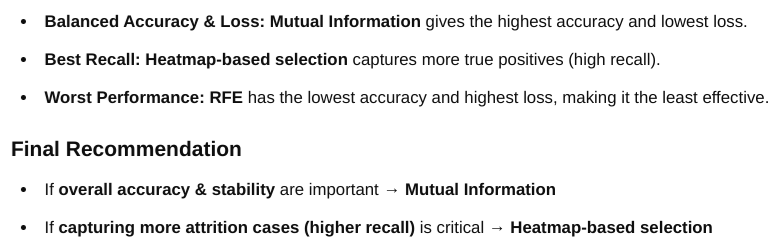

In [ ]:
####################################################################################################

# **Mutual Information Based Feature Selection is Best**

# **1) Random Forest for Mutual Information ( combaine of chi2 & ANOVA ) - Filter Method**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

feature_mi = ['MonthlyIncome','TotalWorkingYears','OverTime','YearsAtCompany','Age','JobLevel','Department_Research_and_Development','Department_Sales','Tenure_Category','JobRole_FreqEncoded','StockOptionLevel','EducationField_FreqEncoded','JobInvolvement']

target_mi = 'Attrition'

X = df[feature_mi]
y = df[target_mi]

# Convert categorical features (if any) to numerical
for col in X.select_dtypes(include=['object']).columns:
    X[col] = X[col].astype('category').cat.codes

# Split data into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)
# Predict on train and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Compute probabilities for cross-entropy loss
y_train_proba = model.predict_proba(X_train)
y_test_proba = model.predict_proba(X_test)

# Evaluate Model Performance
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='binary')
recall = recall_score(y_test, y_test_pred, average='binary')

# Compute Cross-Entropy Loss
train_loss = log_loss(y_train, y_train_proba)
test_loss = log_loss(y_test, y_test_proba)

# Print Results
print("Model Performance Metrics:")
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Train Cross-Entropy Loss: {train_loss:.4f}")
print(f"Test Cross-Entropy Loss: {test_loss:.4f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))


Model Performance Metrics:
Train Accuracy: 1.0000
Test Accuracy: 0.8394
Precision: 0.5000
Recall: 0.1750
Train Cross-Entropy Loss: 0.0933
Test Cross-Entropy Loss: 0.5380

Confusion Matrix:
[[202   7]
 [ 33   7]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       209
           1       0.50      0.17      0.26        40

    accuracy                           0.84       249
   macro avg       0.68      0.57      0.58       249
weighted avg       0.80      0.84      0.81       249



# **After Using Random Forest Test Accuracy was Increased But Overfitting Happen**

# **Cross Validation for Random Forest**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, log_loss

# Define features and target
feature_mi = ['MonthlyIncome', 'TotalWorkingYears', 'OverTime', 'YearsAtCompany', 'Age',
              'JobLevel', 'Department_Research_and_Development', 'Department_Sales',
              'Tenure_Category', 'JobRole_FreqEncoded', 'StockOptionLevel',
              'EducationField_FreqEncoded', 'JobInvolvement']
target_mi = 'Attrition'

X = df[feature_mi]
y = df[target_mi]

# Convert categorical features (if any) to numerical
for col in X.select_dtypes(include=['object']).columns:
    X[col] = X[col].astype('category').cat.codes

# Set up Stratified K-Fold
kf = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

# Store performance metrics for each fold
train_accuracies, test_accuracies = [], []
precisions, recalls, losses = [], [], []

# Perform Stratified K-Fold Cross-Validation
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train Random Forest
    model = RandomForestClassifier(class_weight={0: 1, 1: 3}, random_state=42)
    model.fit(X_train, y_train)

    # Train & Test Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    y_test_proba = model.predict_proba(X_test)

    # Evaluate performance
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    precisions.append(precision_score(y_test, y_test_pred, average='binary'))
    recalls.append(recall_score(y_test, y_test_pred, average='binary'))
    losses.append(log_loss(y_test, y_test_proba))

# Print average performance across folds
print("Stratified K-Fold Cross-Validation Results:")
print(f"Average Train Accuracy: {np.mean(train_accuracies):.4f}")
print(f"Average Test Accuracy: {np.mean(test_accuracies):.4f}")
print(f"Average Precision: {np.mean(precisions):.4f}")
print(f"Average Recall: {np.mean(recalls):.4f}")
print(f"Average Cross-Entropy Loss: {np.mean(losses):.4f}")


Stratified K-Fold Cross-Validation Results:
Average Train Accuracy: 1.0000
Average Test Accuracy: 0.8416
Average Precision: 0.5259
Average Recall: 0.1450
Average Cross-Entropy Loss: 0.4704


# **After Using Cross Validation Stratified K-fold - 2 splits but still Overfitt not prevent**

# **class weight concentrated :- 0: 1, 1: 3**

In [ ]:
########################################################################################

# **Hyperparameter tuning to find best params for our model**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'max_features': ['sqrt', 'log2'],
    'class_weight': [{0: 1, 1: 2}, {0: 1, 1: 3}, 'balanced']
}

# Initialize model
rf = RandomForestClassifier(random_state=42)

# Randomized Search
random_search = RandomizedSearchCV(rf, param_distributions=param_grid,
                                   n_iter=20, cv=5, scoring='recall',
                                   random_state=42, n_jobs=-1)
random_search.fit(X, y)

# Best parameters
print("Best Parameters:", random_search.best_params_)

# Evaluate best model
best_model = random_search.best_estimator_

Best Parameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 5, 'class_weight': 'balanced'}


In [ ]:
from sklearn.ensemble import RandomForestClassifier

feature_mi = ['MonthlyIncome','TotalWorkingYears','OverTime','YearsAtCompany','Age','JobLevel','Department_Research_and_Development','Department_Sales','Tenure_Category','JobRole_FreqEncoded','StockOptionLevel','EducationField_FreqEncoded','JobInvolvement']

target_mi = 'Attrition'

X = df[feature_mi]
y = df[target_mi]

# Convert categorical features (if any) to numerical
for col in X.select_dtypes(include=['object']).columns:
    X[col] = X[col].astype('category').cat.codes

# Split data into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
model = RandomForestClassifier(n_estimators=300, min_samples_split=5, min_samples_leaf=5, max_features='sqrt', max_depth=5, class_weight='balanced')
model.fit(X_train, y_train)
# Predict on train and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Compute probabilities for cross-entropy loss
y_train_proba = model.predict_proba(X_train)
y_test_proba = model.predict_proba(X_test)

# Evaluate Model Performance
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='binary')
recall = recall_score(y_test, y_test_pred, average='binary')

# Compute Cross-Entropy Loss
train_loss = log_loss(y_train, y_train_proba)
test_loss = log_loss(y_test, y_test_proba)

# Print Results
print("Model Performance Metrics:")
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Train Cross-Entropy Loss: {train_loss:.4f}")
print(f"Test Cross-Entropy Loss: {test_loss:.4f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))


Model Performance Metrics:
Train Accuracy: 0.8643
Test Accuracy: 0.8193
Precision: 0.4510
Recall: 0.5750
Train Cross-Entropy Loss: 0.4400
Test Cross-Entropy Loss: 0.5008

Confusion Matrix:
[[181  28]
 [ 17  23]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       209
           1       0.45      0.57      0.51        40

    accuracy                           0.82       249
   macro avg       0.68      0.72      0.70       249
weighted avg       0.84      0.82      0.83       249



# **class 0 has high precision, recall and f1 score reason my dataset has imbalanced that why showing huge difference of class 0 and class 1**

# **so focus on weighted average**

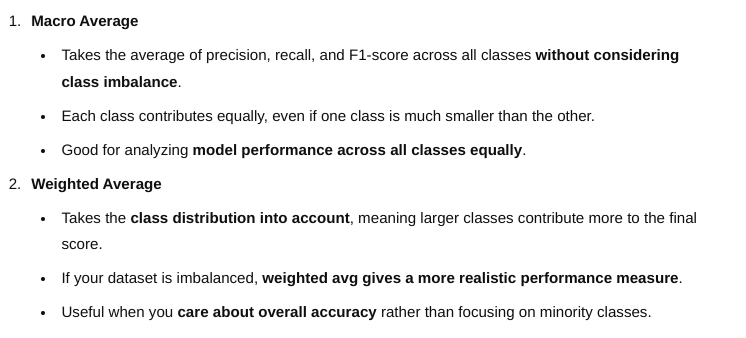

In [ ]:
#########################################################################################

# **Hyperparameter tunning applied on my Random forest Model with Cross Validation**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, log_loss

# Define features and target
feature_mi = ['MonthlyIncome', 'TotalWorkingYears', 'OverTime', 'YearsAtCompany', 'Age',
              'JobLevel', 'Department_Research_and_Development', 'Department_Sales',
              'Tenure_Category', 'JobRole_FreqEncoded', 'StockOptionLevel',
              'EducationField_FreqEncoded', 'JobInvolvement']
target_mi = 'Attrition'

X = df[feature_mi]
y = df[target_mi]

# Convert categorical features (if any) to numerical
for col in X.select_dtypes(include=['object']).columns:
    X[col] = X[col].astype('category').cat.codes

# Set up Stratified K-Fold
kf = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

# Store performance metrics for each fold
train_accuracies, test_accuracies = [], []
precisions, recalls, losses = [], [], []

# Perform Stratified K-Fold Cross-Validation
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train Random Forest

    model = RandomForestClassifier(n_estimators=300, min_samples_split=5, min_samples_leaf=5, max_features='sqrt', max_depth=5, class_weight={0: 1, 1: 3})
    model.fit(X_train, y_train)

    # Train & Test Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    y_test_proba = model.predict_proba(X_test)

    # Evaluate performance
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    precisions.append(precision_score(y_test, y_test_pred, average='binary'))
    recalls.append(recall_score(y_test, y_test_pred, average='binary'))
    losses.append(log_loss(y_test, y_test_proba))

# Print average performance across folds
print("Stratified K-Fold Cross-Validation Results:")
print(f"Average Train Accuracy: {np.mean(train_accuracies):.4f}")
print(f"Average Test Accuracy: {np.mean(test_accuracies):.4f}")
print(f"Average Precision: {np.mean(precisions):.4f}")
print(f"Average Recall: {np.mean(recalls):.4f}")
print(f"Average Cross-Entropy Loss: {np.mean(losses):.4f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))


Stratified K-Fold Cross-Validation Results:
Average Train Accuracy: 0.8883
Average Test Accuracy: 0.8352
Average Precision: 0.4819
Average Recall: 0.3350
Average Cross-Entropy Loss: 0.4308

Confusion Matrix:
[[487  35]
 [ 65  35]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.91       522
           1       0.50      0.35      0.41       100

    accuracy                           0.84       622
   macro avg       0.69      0.64      0.66       622
weighted avg       0.82      0.84      0.83       622



In [ ]:
###############################################################################################

# **Check AUC and ROC Curve**

In [ ]:
###################################################################################

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, precision_recall_curve, f1_score

# Get predicted probabilities for the positive class (Attrition=1)
y_probs = model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Compute Youden’s J statistic
j_scores = tpr - fpr
best_threshold_j = thresholds[np.argmax(j_scores)]

# Compute F1-scores for different thresholds
f1_scores = [f1_score(y_test, (y_probs >= t).astype(int)) for t in thresholds]
best_threshold_f1 = thresholds[np.argmax(f1_scores)]

# Compute Precision-Recall curve (alternative for imbalanced data)
precisions, recalls, pr_thresholds = precision_recall_curve(y_test, y_probs)
f1_scores_pr = [2 * (p * r) / (p + r) if (p + r) > 0 else 0 for p, r in zip(precisions, recalls)]
best_threshold_pr = pr_thresholds[np.argmax(f1_scores_pr)]

# Print results
print(f"Best Threshold (Youden's J): {best_threshold_j:.4f}")
print(f"Best Threshold (F1-score - ROC curve): {best_threshold_f1:.4f}")
print(f"Best Threshold (F1-score - Precision-Recall curve): {best_threshold_pr:.4f}")

Best Threshold (Youden's J): 0.4422
Best Threshold (F1-score - ROC curve): 0.5195
Best Threshold (F1-score - Precision-Recall curve): 0.5195


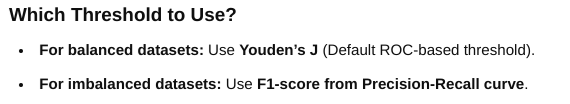

# **My Dataset has Imbalanced so Focus on F1-Score - precision-Recall Curve  -   0.5255**

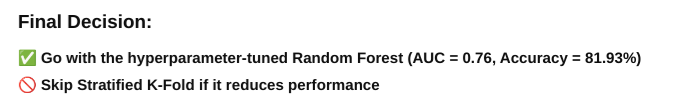

AUC Score: 0.7612


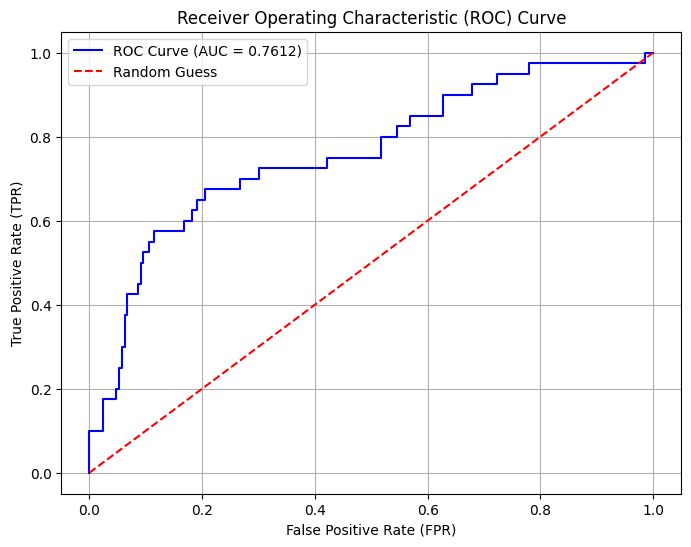

Using Threshold = 0.5195
Accuracy: 0.8353
Precision: 0.4894
Recall: 0.5750
F1 Score: 0.5287


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# Get predicted probabilities for the positive class (Attrition=1)
y_probs = model.predict_proba(X_test)[:, 1]

# Compute AUC score
auc_score = roc_auc_score(y_test, y_probs)
print(f"AUC Score: {auc_score:.4f}")

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {auc_score:.4f})")
plt.plot([0, 1], [0, 1], color='red', linestyle="--", label="Random Guess")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.grid()
plt.show()

# Define a custom threshold (example: 0.45)
custom_threshold = 0.5195

# Convert predicted probabilities to class labels using the custom threshold
y_pred_custom = (y_probs >= custom_threshold).astype(int)

# Evaluate performance with the new threshold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred_custom)
precision = precision_score(y_test, y_pred_custom)
recall = recall_score(y_test, y_pred_custom)
f1 = f1_score(y_test, y_pred_custom)

print(f"Using Threshold = {custom_threshold}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

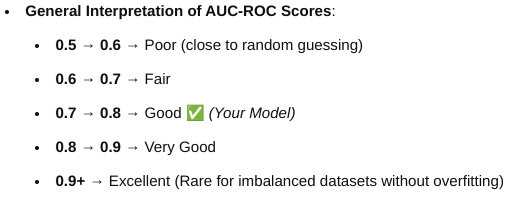

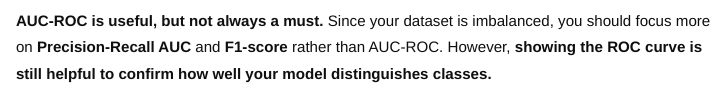

In [ ]:
###################################################################################

# **Save this [ Hyerparameter Tuned Random Forest ]model**

In [ ]:
import joblib

# Save the trained Random Forest model
joblib.dump(model, "random_forest_best_1st.pkl")

# Save the feature list
joblib.dump(feature_mi, "random_forest_features_1st.pkl")

print("Model and features saved successfully!")

Model and features saved successfully!
